Author : Pradeeshkumar U,
Date   : 20-01-2025,
Topic  : Spam SMS Prediction

Importing necessary Packages:

In [193]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

Import the dataset

In [194]:
warnings.filterwarnings('ignore')

data = pd.read_csv('data/spam.csv',encoding='latin-1')

data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [195]:
data[data.iloc[:,2:5].notnull().all(axis=1)]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
2255,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe..."
3525,ham,\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...,HAD A COOL NYTHO,TX 4 FONIN HON,"CALL 2MWEN IM BK FRMCLOUD 9! J X\"""""
4668,ham,"When I was born, GOD said, \Oh No! Another IDI...",GOD said,"\""OH No! COMPETITION\"". Who knew","one day these two will become FREINDS FOREVER!"""
5048,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""


We have some Data in the 3 4 5 columns let's add them to v2:

In [196]:
for col in data.iloc[:,2:5]:
    data['v2']+=data[col].fillna('')
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

Let's Explore the data:

In [197]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [198]:
data['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

Let's handle this imbalance data:

In [199]:
ham = data[data['v1']=='ham']
spam = data[data['v1']=='spam']

In [200]:
ham.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [201]:
spam.head()

,v1,v2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [202]:
new_ham=ham.sample(n=len(spam),random_state=2)

In [203]:
print(f'Shape of ham is {new_ham.shape}\nShape of spam is {spam.shape}')

Shape of ham is (747, 2)
Shape of spam is (747, 2)


In [204]:
new_data = pd.concat([new_ham,spam])

new_data['v1'] = new_data['v1'].map({'ham':0,'spam':1})

Splitting the Data into Training data and Testing data:

In [205]:
x = new_data['v2']

y = new_data['v1']

In [206]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=2)

Feature Extraction:

In [207]:
counter = CountVectorizer(stop_words='english')

X_train_vec = counter.fit_transform(X_train)
X_test_vec = counter.transform(X_test)

Building Naive Bayes - MultinomialNB model:

In [208]:
model = MultinomialNB()

model.fit(X_train_vec,Y_train)

MultinomialNB()

Evaluating the Model:

In [209]:
Y_pred = model.predict(X_test_vec)

Confusion Matrix:

In [210]:
set(Y_test)

{0, 1}

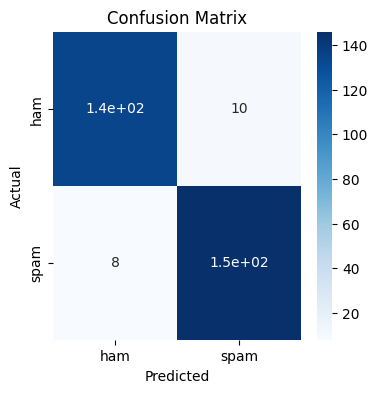

In [211]:
labels = ['ham','spam']
cm = confusion_matrix(Y_test,Y_pred)

plt.figure(figsize=[4,4])
sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy Score:

In [212]:
print('The Accuracy score is : ',accuracy_score(Y_test,Y_pred))

The Accuracy score is :  0.939799331103679


Classification Report:

In [213]:
print('The Classification report is :',classification_report(Y_test,Y_pred))

The Classification report is :               precision    recall  f1-score   support

           0       0.94      0.93      0.94       145
           1       0.94      0.95      0.94       154

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299



Example Test Case:

In [214]:
emails = [
    "Congratulations, you've won a $1000 gift card! Click the link below to claim your prize now. [link] Act fast!",
    "We have an amazing investment opportunity for you! Reply to this email for more details.",
    "Your bank account has been compromised! Please click here immediately to secure your account: [link]",
    "We're giving away free iPhones! Sign up now for your chance to win a brand-new iPhone!",
    "Your Amazon order is waiting for payment! Please confirm your payment details here: [link]",
    "Meeting schedule for next week. Just a reminder that our meeting is scheduled for Monday at 10:00 AM. Please be on time.",
    "We're planning a family get-together this weekend. Let me know if you're available.",
    "Your flight from New York to Los Angeles has been successfully booked for the 15th of May. Flight number: XYZ123. Departure: 10:00 AM.",
    "Please find attached the draft for the article on sustainable living. Let me know your thoughts.",
    "I've attached the grocery list for the week. Please let me know if I missed anything."
]

labels = [
    "Spam",
    "Spam",
    "Spam",
    "Spam",
    "Spam",
    "Ham",
    "Ham",
    "Ham",
    "Ham",
    "Ham"
]

email_vec = counter.transform(emails)

pred = model.predict(email_vec)

pred_labels = ['ham' if p==0 else 'spam' for p in pred]

for i in range(len(emails)):
    print(f'\n{i+1}.{emails[i]}\n   Actual : {labels[i]}\nPredicted : {pred_labels[i]}')
    




1.Congratulations, you've won a $1000 gift card! Click the link below to claim your prize now. [link] Act fast!
   Actual : Spam
Predicted : spam

2.We have an amazing investment opportunity for you! Reply to this email for more details.
   Actual : Spam
Predicted : spam

3.Your bank account has been compromised! Please click here immediately to secure your account: [link]
   Actual : Spam
Predicted : spam

4.We're giving away free iPhones! Sign up now for your chance to win a brand-new iPhone!
   Actual : Spam
Predicted : spam

5.Your Amazon order is waiting for payment! Please confirm your payment details here: [link]
   Actual : Spam
Predicted : ham

6.Meeting schedule for next week. Just a reminder that our meeting is scheduled for Monday at 10:00 AM. Please be on time.
   Actual : Ham
Predicted : spam

7.We're planning a family get-together this weekend. Let me know if you're available.
   Actual : Ham
Predicted : ham

8.Your flight from New York to Los Angeles has been successfu